In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_DE = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "Germany")].copy()
df_DA_DE.loc[df_DA_DE["job_location"].str.strip() == "Germany", "job_location"] = "Germany (other place)"
df_DA_DE.head(1)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}


### Locations to Explore (in Germany)

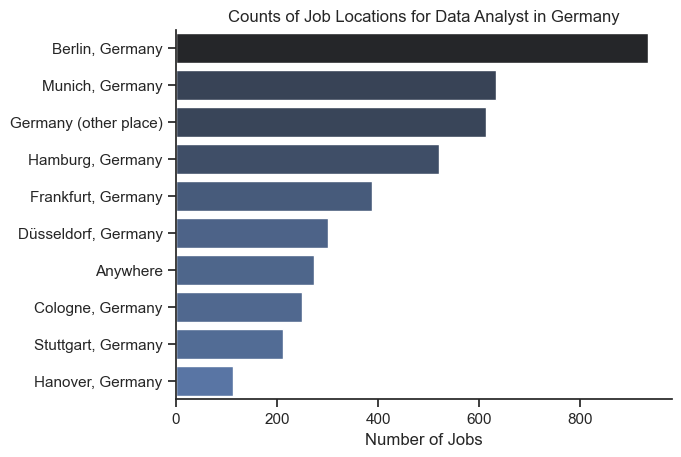

In [17]:
df_plot = df_DA_DE["job_location"].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="job_location", hue="count", palette="dark:b_r", legend=False)
sns.despine() # to remove spines/frame
plt.title("Counts of Job Locations for Data Analyst in Germany")
plt.xlabel("Number of Jobs")
plt.ylabel("")

plt.show()

### Job Opportunities - Benefit Analysis (All countries)

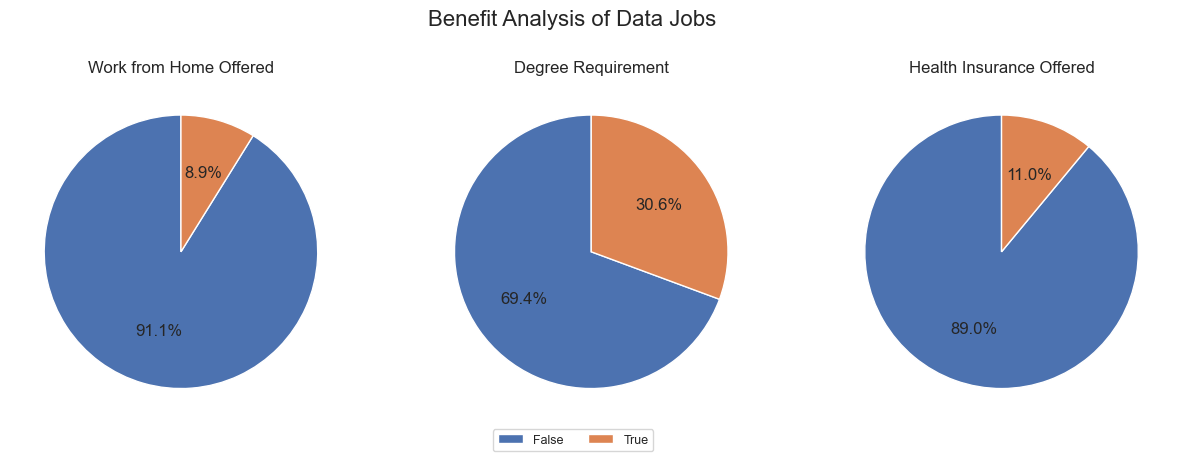

In [15]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(15, 5)) # W:15", H:5"
# fig.set_size_inches((12, 5)) # Alternative option

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=None, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.legend(labels=["False", "True"], loc='upper right', bbox_to_anchor=(-0.5, 0), fontsize=9, ncol=2)
# fig.legend(labels=["False", "True"], loc='lower center', ncol=2, fontsize=10) # Alternative

plt.show()

### Job Opportunities -Benefit Analysis (Germany)

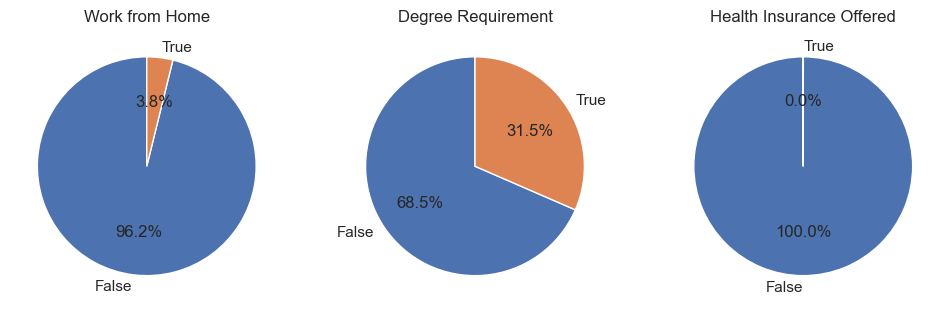

In [6]:
dict_column = {
    "job_work_from_home": "Work from Home",
    "job_no_degree_mention": "Degree Requirement",
    "job_health_insurance": "Health Insurance Offered"
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):

    ax[i].pie(df_DA_DE[column].value_counts(), labels=["False", "True"], startangle=90, autopct="%1.1f%%")
    ax[i].set_title(title)

plt.show()

### Companies to explore (All countries)

<function matplotlib.pyplot.show(close=None, block=None)>

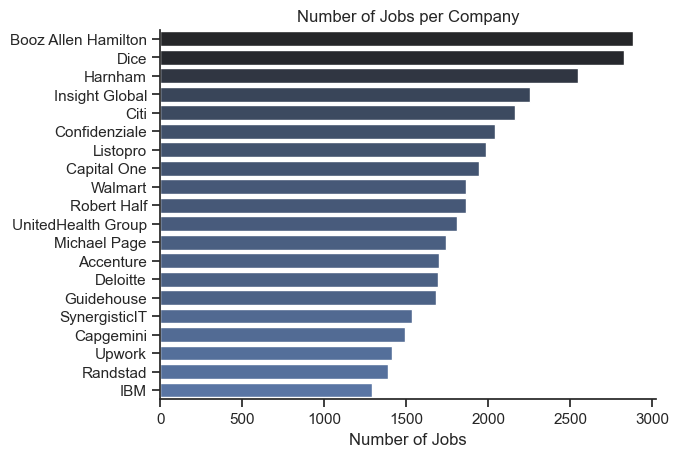

In [13]:
# Skip the 1st top company as outlier
df_plot_general = df["company_name"].value_counts().to_frame()[1:].head(20)

sns.set_theme(style="ticks")
sns.barplot(data=df_plot_general, x="count", y="company_name", hue="count", palette="dark:b_r", legend=False)
sns.despine() # to remove spines/frame
plt.title("Number of Jobs per Company")
plt.xlabel("Number of Jobs")
plt.ylabel("")

plt.show

### Companies to Explore (Germany)

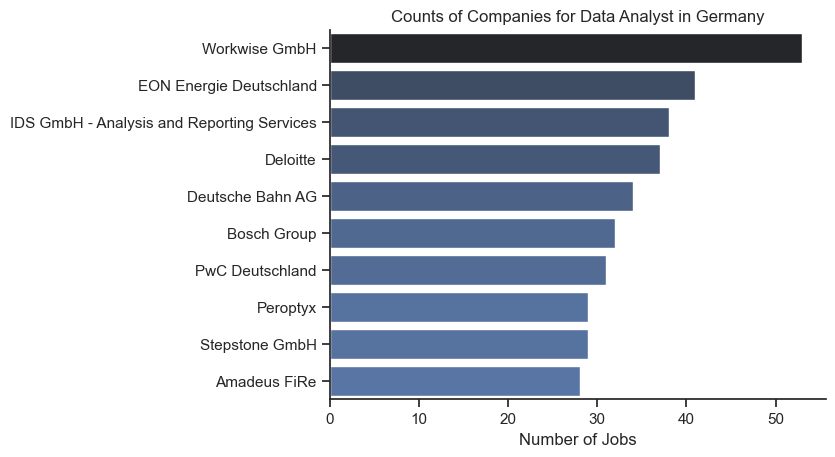

In [7]:
df_plot = df_DA_DE["company_name"].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="company_name", hue="count", palette="dark:b_r", legend=False)
sns.despine() # to remove spines/frame
plt.title("Counts of Companies for Data Analyst in Germany")
plt.xlabel("Number of Jobs")
plt.ylabel("")

plt.show()

### Roles to Explore (Germany)

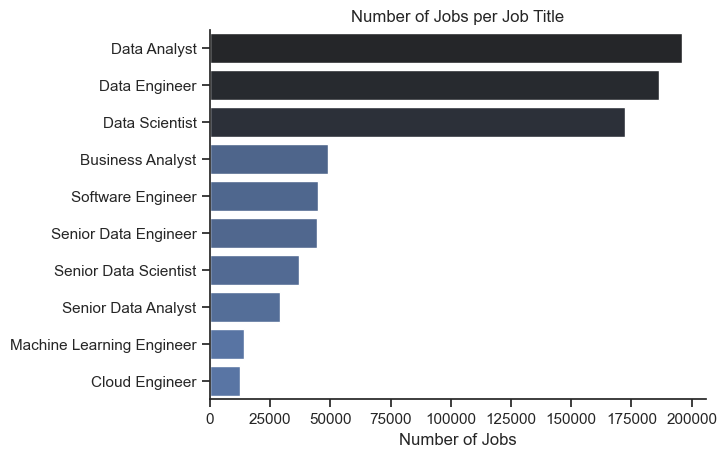

In [8]:
df_plot = df["job_title_short"].value_counts().to_frame()

# sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x="count", y="job_title_short", hue="count", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Number of Jobs per Job Title")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

### Countries to Explore

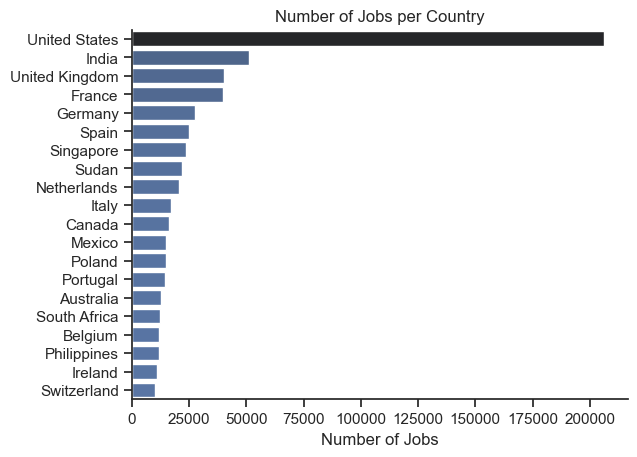

In [10]:
df_plot = df["job_country"].value_counts().to_frame().head(20)

# sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x="count", y="job_country", hue="count",\
             palette="dark:b_r", legend=False)
sns.despine()
plt.title("Number of Jobs per Country")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()